# Identifying AI-generated images using Convolutional Neural Networks

In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout

In [2]:
# import tensorflow as tf
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# config = tf.compat.v1.ConfigProto(gpu_options = 
#                          tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.8)
# )
# config.gpu_options.allow_growth = True
# session = tf.compat.v1.Session(config=config)
# tf.compat.v1.keras.backend.set_session(session)

In [3]:
# Building model
classifier = Sequential()

classifier.add(Convolution2D(100, (3, 3), activation="relu", input_shape=(32, 32, 3)))
classifier.add(MaxPooling2D(2, 2))

classifier.add(Convolution2D(100, (3, 3), activation="relu"))
classifier.add(MaxPooling2D(2, 2))

classifier.add(Flatten())
classifier.add(Dropout(0.5))

classifier.add(Dense(50, activation="relu"))
classifier.add(Dense(2, activation="softmax"))

In [4]:
# Model Summary
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 100)       2800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 100)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 100)       90100     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 100)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3600)              0         
                                                                 
 dropout (Dropout)           (None, 3600)              0

In [5]:
# Compiling the CNN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [6]:
# Loading data and Image Augmentation
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_generator = train_datagen.flow_from_directory('../datasets/CIFAKE/train', 
                                                    batch_size=10, 
                                                    target_size=(32, 32))
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory('../datasets/CIFAKE/test', 
                                                         batch_size=10, 
                                                         target_size=(32, 32))

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


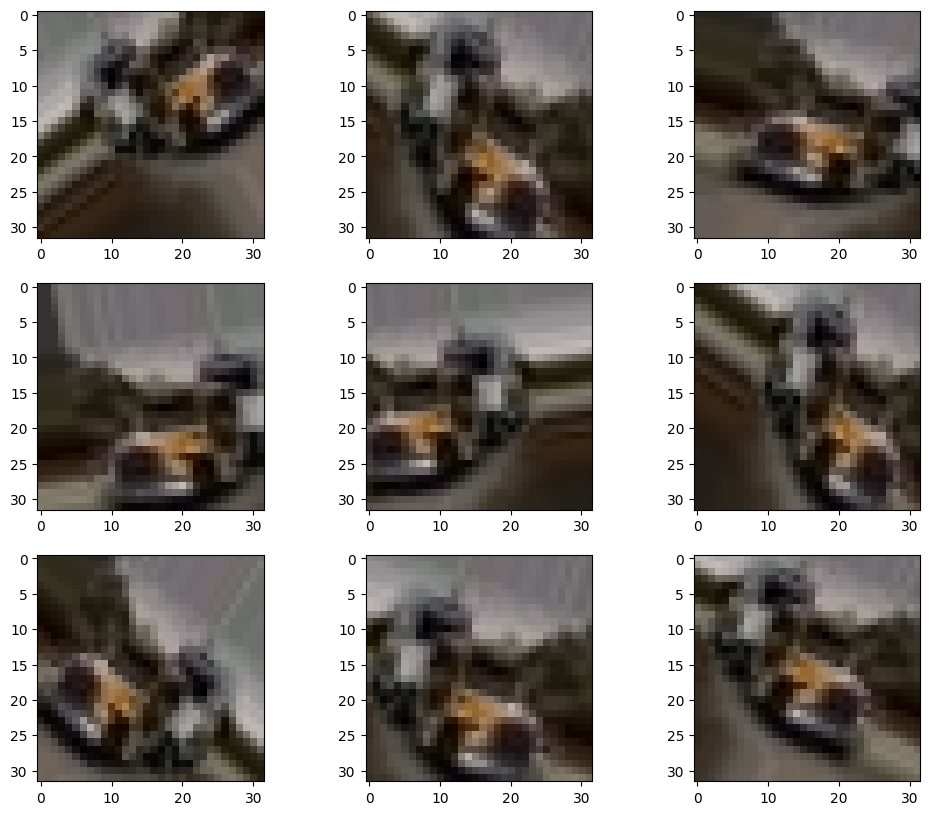

In [7]:
# Sample of Image Augmentation
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# load the image
img = load_img('../datasets/CIFAKE/train/FAKE/1000 (10).jpg')
# Convert to numpy array
data = img_to_array(img)
# Expand dimension to one sample
samples = expand_dims(data, 0)
# Create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')
# Prepare iterator
it = datagen.flow(samples, batch_size=1)
plt.figure(figsize=(12,10))
# Generate samples and plot
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # Generate batch of images
 batch = it.next()
 # Convert to unsigned integers for viewing
 image = batch[0].astype('uint8')
 # Plot raw pixel data
 plt.imshow(image)
# Show the figure
plt.show()

In [8]:
# Training Model
history = classifier.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
)

Epoch 1/5
10000/10000 [==============================] - 559s 55ms/step - loss: 0.4758 - accuracy: 0.7707 - val_loss: 0.5415 - val_accuracy: 0.7641
Epoch 2/5
10000/10000 [==============================] - 403s 40ms/step - loss: 0.3817 - accuracy: 0.8306 - val_loss: 0.4374 - val_accuracy: 0.7910
Epoch 3/5
10000/10000 [==============================] - 577s 58ms/step - loss: 0.3530 - accuracy: 0.8456 - val_loss: 0.4292 - val_accuracy: 0.8029
Epoch 4/5
10000/10000 [==============================] - 248s 25ms/step - loss: 0.3348 - accuracy: 0.8541 - val_loss: 0.4659 - val_accuracy: 0.7908
Epoch 5/5
10000/10000 [==============================] - 67s 7ms/step - loss: 0.3212 - accuracy: 0.8617 - val_loss: 0.4181 - val_accuracy: 0.8318


Text(0.5, 1.0, 'Accuracy Curve')

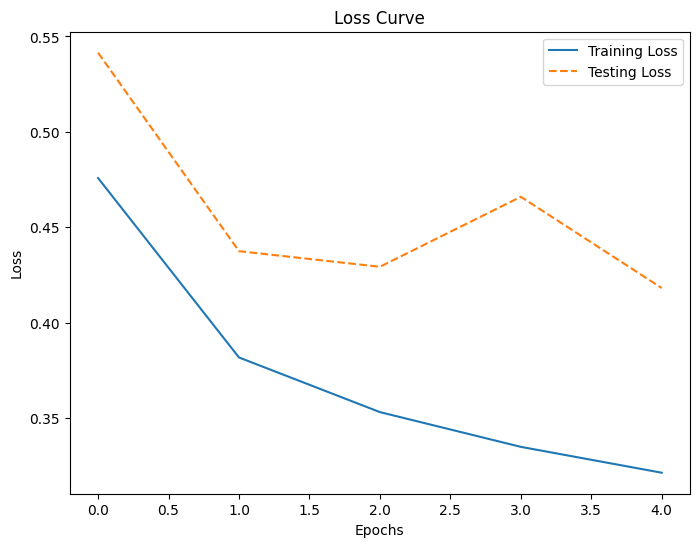

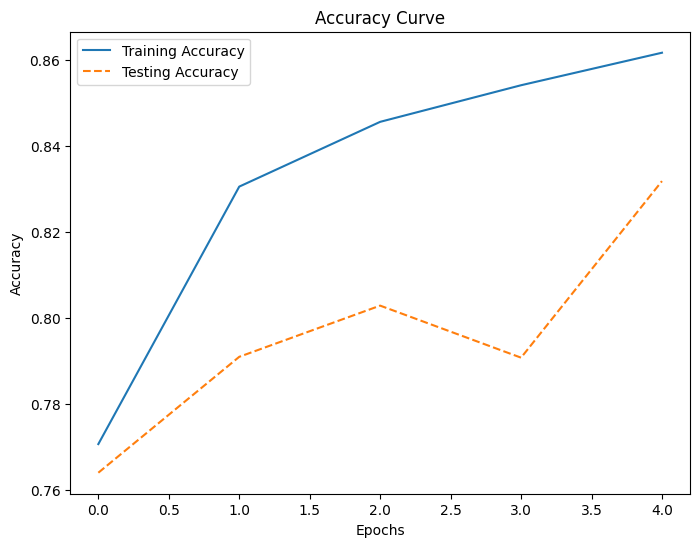

In [9]:
# Loss Curves
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],ls='--')
plt.legend(['Training Loss','Testing Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss Curve")

# Accuracy Curves
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],ls='--')
plt.legend(['Training Accuracy','Testing Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy Curve")